### Project: Predicting the Boston Housing Prices

In [28]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


In [29]:
# DATA EXPLORATION: Statistics of the dataset
# Minimum price of the data
minimum_price = np.min(prices)

# Maximum price of the data
maximum_price = np.max(prices)

#Mean price of the data
mean_price = np.mean(prices)

#Median price of the data
median_price = np.median(prices)

#Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


In [30]:
# DEVELOPING A MODEL
from sklearn.metrics import r2_score

"""
The following code calculates and returns the performance score between 
true and predicted values based on the metric chosen. 
"""

def performance_metric(y_true, y_predict):    
    # Calculating the performance score 
    score = r2_score(y_true, y_predict)
    
    return score

In [31]:
# Splitting the dataset into training and testing dataset
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 29)

print "Training and testing split was successful."

Training and testing split was successful.


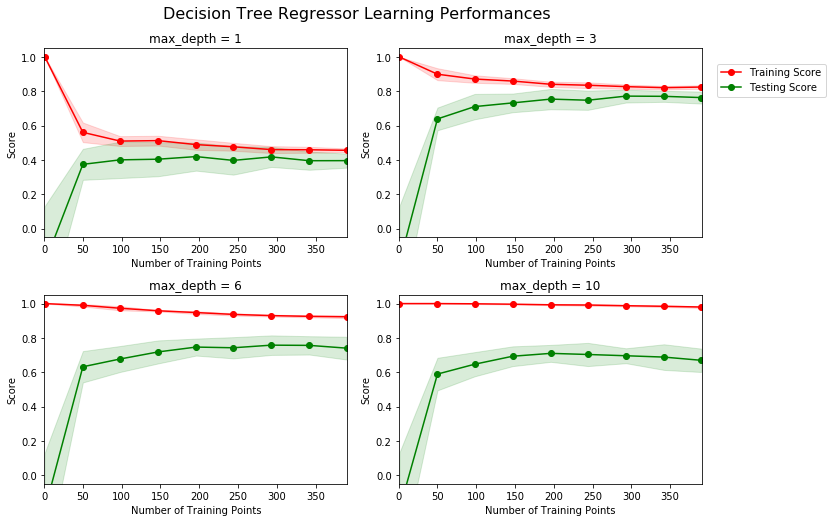

In [32]:
"""
Visualizing four graphs for a decision tree model with different maximum depths. 
Each graph visualizes the learning curves of the model for both training and testing as the size of the training set 
is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve 
(measured as the standard deviation). The model is scored on both the training and testing sets using R2, 
the coefficient of determination.
"""
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)


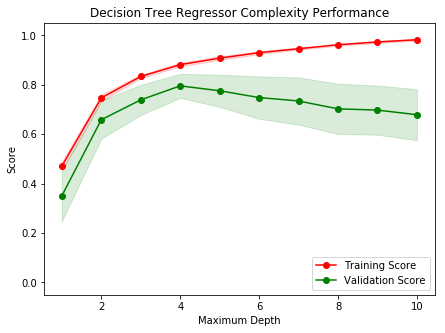

In [33]:
"""
The following code cell produces a graph for a decision tree model that has been trained and validated on the training
data using different maximum depths. The graph produces two complexity curves — one for training and one for 
validation. Similar to the learning curves, the shaded regions of both the complexity curves denote the uncertainty in those 
curves, and the model is scored on both the training and validation sets using the performance_metric function.
"""

vs.ModelComplexity(X_train, y_train)

In [34]:
# FITTING MODEL
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state = 29)

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth' : list(range(1,10))}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    
    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)
    
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [35]:
#Determinig the maximum depth of the optimal model

# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


In [36]:
# Predicting Selling Prices
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $415,400.00
Predicted selling price for Client 2's home: $223,608.00
Predicted selling price for Client 3's home: $919,800.00


In [37]:
"""
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple 
to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not 
appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too 
few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted.

Running the fit_model function ten times with different training and testing sets to 
see how the prediction for a specific client changes with respect to the data it's trained on.
"""

vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39
